# Linear Regression

Before we start, let's define some terminologies: <br>
$X = $Tensor with all of the input datapoints. <br>
$Y = $Tensor with all of the labelled outputs. This is only part of supervised machine learning datasets. <br>
$F(X)$ is the forward model (also called the inference model). It takes in the input datapoints and produces a guess <br>
$x^{(i)}$ is the $i$-th datapoint in $X$. <br>
$y^{(i)}$ is the $i$-th output in $Y$. <br> 

In [4]:
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import torch

Let there be N datapoints $(x, y)$. We vectorize the $x-$coordinates of the datapoints into $\pmb{x} \in \mathbb{R}^N$, and the $y-$ coordinates of the datapoints into $\pmb{y} \in \mathbb{R}^N$. 
In linear regression, the forward model $F(X) = X^TW$. This means that I want to find the model parameters $W$ such that $Y$ is approximated by $F(X) = X^TW$. <br>
I want to find a linear equation $y = w_1 x + w_2$ that best "approximates" the linear relationship between x and y.

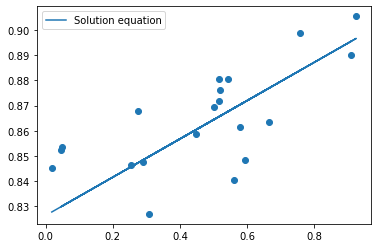

In [133]:
# Problem setup: We have N datapoints and randomly assigned coefficients w1 and w2
N = 20
[w1, w2] = st.uniform().rvs(2)

# Creating datapoints: (x, y) pairs are created and Gaussian noise is added to the output y
x =  st.uniform().rvs(N)
n = st.norm().rvs(N)/50
y = w1*x + w2 + n

# Plotting the (x, y) pairs created
plt.scatter(x, y)
plt.plot(x, w1*x + w2, label='Solution equation', )
plt.legend()

Solving for the best guess:
We want to provide the best guess for parameters w1 and w2 such that the squared distance in y-axis between our fitted equation and the (x, y) pairs are minimized. The diagram below depicts our objective graphically: 
<img src = "linear_regression_distance.png"/>
We define this mathematically in the following way: 


Higher dimensional case: 
We generalize this to a higher dimensional case with vector notation defined in the following way: 


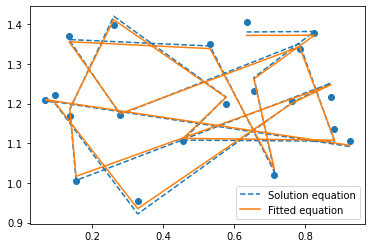

In [164]:
N = 20
dim = 2 # Feature dimension for each datapoint. 
x = np.ones((dim+1, N)) # add one to allow for constant offset
x[:dim,:] = st.uniform().rvs((dim,N)) # dim x N
w = st.uniform().rvs(dim+1) # 1 x dim+1 matrix of weights
n = st.norm().rvs(N)/50
y = x.T@w+n
plt.scatter(x[1], y)
plt.plot(x[1], x.T@w, '--', label="Solution equation")
w_star = np.linalg.inv(x@x.T)@x@y
plt.plot(x[1], x.T@w_star, label="Fitted equation")
plt.legend()

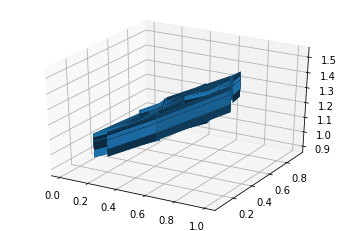

In [165]:
# Better visualize the 3D plot
X,Y = np.meshgrid(x[0], x[1])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x[0], x[1], w[0]*X+w[1]*Y+w[2])

Special Case: Polynomial Fitting
One special case of linear regression worth mentioning is the Vandermonde Matrix used in Numerical Analysis. 

(2, 20)


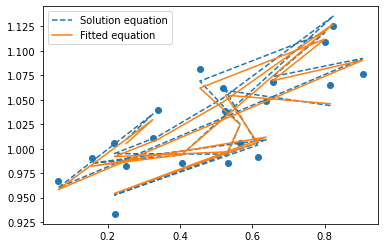

In [169]:
N = 20
dim = 2 # Feature dimension for each datapoint. 
x = np.ones((dim+1, N)) # add one to allow for constant offset
x[:dim,:] = st.uniform().rvs((dim,N)) # dim x N
w = st.uniform().rvs(dim+1) # 1 x dim+1 matrix of weights
n = st.norm().rvs(N)/50
y = x.T@w+n
plt.scatter(x[1], y)
plt.plot(x[1], x.T@w, '--', label="Solution equation")
w_star = np.linalg.inv(x@x.T)@x@y
plt.plot(x[1], x.T@w_star, label="Fitted equation")
plt.legend()

Algorithm and Performance Consideration:
Note that we are inverting a very large matrix. This can be overcome with matrix factorization. We can also perform optimization, but this will be discussed at another time (See: Logistic Regression). 

Probability Theory Approach: MMSE Estimator
We can also express linear expression as a ML (Most Likelihood) Estimator of Gaussian random variable Y based on X. 

In [ ]:
N = 20
X = st.norm().rvs(N)
Y = w1

Probability Theory approach allows us to bound the error of our regression. Using ___'s Inequality, 

PyTorch Implementation:

We can develop this into two new ideas: 
1. Machine Learning approach: Regressing from datapoints
2. Probability Theory approach: Minimum Mean Square Error Estimator of Random Variables